In [1]:
import numpy as np
import smartlab as sl
import pandas as pd
import seaborn
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
from scipy.interpolate import interp1d

In [2]:
seaborn.set_style(style='whitegrid')

In [5]:
ohm0 = pd.read_csv('ohm0.tsv', delimiter='\t')
ohm0

,"$U,\ \text{дел}$","$\nu,\ \text{кГц}$"
0,1.0,1.431
1,1.6,1.475
2,2.2,1.500
3,2.6,1.510
4,3.0,1.518
5,3.2,1.522
6,3.4,1.525
7,3.6,1.528
8,3.8,1.531
9,4.0,1.533


In [7]:
ohm0['$U/U_0$'] = round(ohm0.iloc[:, 0]/5.7, 2)
ohm0['$\\nu/\\nu_0$'] = round(ohm0.iloc[:, 1]/1.559, 3)
ohm0

,"$U,\ \text{дел}$","$\nu,\ \text{кГц}$",$U/U_0$,$\nu/\nu_0$
0,1.0,1.431,0.18,0.918
1,1.6,1.475,0.28,0.946
2,2.2,1.500,0.39,0.962
3,2.6,1.510,0.46,0.969
4,3.0,1.518,0.53,0.974
5,3.2,1.522,0.56,0.976
6,3.4,1.525,0.60,0.978
7,3.6,1.528,0.63,0.980
8,3.8,1.531,0.67,0.982
9,4.0,1.533,0.70,0.983


In [12]:
ohm100 = pd.read_csv('ohm100.tsv', delimiter='\t')
ohm100

,"$U,\ \text{дел}$","$\nu,\ \text{кГц}$"
0,2.00,1.382
1,2.40,1.415
2,2.60,1.431
3,2.80,1.444
4,3.00,1.457
5,3.20,1.469
6,3.40,1.480
7,3.60,1.493
8,3.80,1.503
9,4.00,1.515


In [13]:
ohm100['$U/U_0$'] = round(ohm100.iloc[:, 0]/4.45, 2)
ohm100['$\\nu/\\nu_0$'] = round(ohm100.iloc[:, 1]/1.564, 3)
ohm100

,"$U,\ \text{дел}$","$\nu,\ \text{кГц}$",$U/U_0$,$\nu/\nu_0$
0,2.00,1.382,0.45,0.884
1,2.40,1.415,0.54,0.905
2,2.60,1.431,0.58,0.915
3,2.80,1.444,0.63,0.923
4,3.00,1.457,0.67,0.932
5,3.20,1.469,0.72,0.939
6,3.40,1.480,0.76,0.946
7,3.60,1.493,0.81,0.955
8,3.80,1.503,0.85,0.961
9,4.00,1.515,0.90,0.969


In [9]:
f1 = interp1d(ohm0.iloc[:, 3], ohm0.iloc[:, 2], kind='cubic')

In [14]:
f2 = interp1d(ohm100.iloc[:, 3], ohm100.iloc[:, 2], kind='cubic')

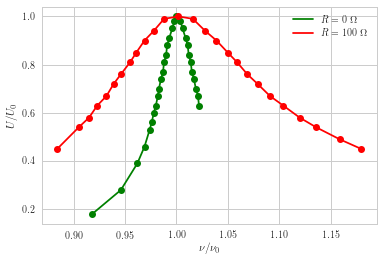

In [28]:
plot(ohm0.iloc[:, 3], ohm0.iloc[:, 2], 'go', label='')
plot(ohm0.iloc[:, 3], f1(ohm0.iloc[:, 3]), '-g', label='$R = 0\ \Omega$')
plot(ohm100.iloc[:, 3], ohm100.iloc[:, 2], 'ro', label='')
plot(ohm100.iloc[:, 3], f2(ohm100.iloc[:, 3]), '-r', label='$R = 100\ \Omega$')
xlabel('$\\nu/\\nu_0$')
ylabel('$U/U_0$')
legend()
savefig('plot.png', dpi=300)

In [21]:
f1(np.linspace(0.95, 1.02, 100))

array([ 0.30343957,  0.3078533 ,  0.31234986,  0.3169299 ,  0.32159403,
        0.32634289,  0.3311771 ,  0.33609731,  0.34110413,  0.34619821,
        0.35138016,  0.35665062,  0.36201023,  0.3674596 ,  0.37299938,
        0.37863019,  0.38435266,  0.39016742,  0.39608335,  0.40213955,
        0.4083821 ,  0.41485703,  0.42161043,  0.42868833,  0.43613681,
        0.44400191,  0.4523297 ,  0.46116617,  0.47051558,  0.48026803,
        0.49029429,  0.50046513,  0.51065132,  0.52072364,  0.5305529 ,
        0.54024733,  0.55071565,  0.56302913,  0.57734414,  0.59193206,
        0.60486835,  0.61564896,  0.62561515,  0.63622964,  0.6489242 ,
        0.66510489,  0.68563034,  0.70652251,  0.72349476,  0.73577   ,
        0.74306362,  0.74930822,  0.76265352,  0.78953502,  0.81483492,
        0.82423144,  0.83100091,  0.8509497 ,  0.88036323,  0.89823638,
        0.90605809,  0.91103186,  0.9181798 ,  0.92745751,  0.93810307,
        0.94935454,  0.96051431,  0.9711903 ,  0.98108093,  0.98

In [29]:
f2(np.linspace(0.92, 1.09, 100))

array([ 0.61219815,  0.62287539,  0.63219098,  0.63991794,  0.64676219,
        0.65353573,  0.66105061,  0.67011884,  0.68124875,  0.69377589,
        0.70675283,  0.71923212,  0.73044787,  0.74051648,  0.74982193,
        0.75874827,  0.76765089,  0.77670925,  0.78603605,  0.79574389,
        0.80594536,  0.81674067,  0.82805715,  0.8396951 ,  0.85145187,
        0.86311471,  0.8744429 ,  0.88519092,  0.89511322,  0.90397555,
        0.91185186,  0.91915401,  0.92631112,  0.93375231,  0.94190494,
        0.95091734,  0.96035479,  0.96970946,  0.97847351,  0.98613913,
        0.99220692,  0.99650499,  0.99928696,  1.00083488,  1.00143077,
        1.00135667,  1.00089464,  1.00032671,  0.99993364,  0.99983731,
        0.99984853,  0.99974198,  0.99929237,  0.9982744 ,  0.99646277,
        0.99363219,  0.98955742,  0.98413026,  0.97759627,  0.97026759,
        0.96245636,  0.95447471,  0.9466348 ,  0.93924866,  0.93251034,
        0.92626931,  0.92031247,  0.9144267 ,  0.90839891,  0.90

In [22]:
sl.table(ohm0)

\begin{tabular}{rrrr}\\
$U,\ \text{дел}$ & $\nu,\ \text{кГц}$ & $U/U_0$ & $\nu/\nu_0$\\ \hline
$1.0$ & $1.431$ & $0.18$ & $0.918$ \\
$1.6$ & $1.475$ & $0.28$ & $0.946$ \\
$2.2$ & $1.5$ & $0.39$ & $0.962$ \\
$2.6$ & $1.51$ & $0.46$ & $0.969$ \\
$3.0$ & $1.518$ & $0.53$ & $0.974$ \\
$3.2$ & $1.522$ & $0.56$ & $0.976$ \\
$3.4$ & $1.525$ & $0.6$ & $0.978$ \\
$3.6$ & $1.528$ & $0.63$ & $0.98$ \\
$3.8$ & $1.531$ & $0.67$ & $0.982$ \\
$4.0$ & $1.533$ & $0.7$ & $0.983$ \\
$4.2$ & $1.535$ & $0.74$ & $0.985$ \\
$4.4$ & $1.538$ & $0.77$ & $0.987$ \\
$4.6$ & $1.541$ & $0.81$ & $0.988$ \\
$4.8$ & $1.543$ & $0.84$ & $0.99$ \\
$5.0$ & $1.545$ & $0.88$ & $0.991$ \\
$5.2$ & $1.548$ & $0.91$ & $0.993$ \\
$5.4$ & $1.552$ & $0.95$ & $0.996$ \\
$5.6$ & $1.556$ & $0.98$ & $0.998$ \\
$5.7$ & $1.559$ & $1.0$ & $1.0$ \\
$5.6$ & $1.565$ & $0.98$ & $1.004$ \\
$5.4$ & $1.569$ & $0.95$ & $1.006$ \\
$5.2$ & $1.573$ & $0.91$ & $1.009$ \\
$5.0$ & $1.576$ & $0.88$ & $1.011$ \\
$4.8$ & $1.578$ & $0.84$ & $1.012$ \\
$4.

In [23]:
sl.table(ohm100)

\begin{tabular}{rrrr}\\
$U,\ \text{дел}$ & $\nu,\ \text{кГц}$ & $U/U_0$ & $\nu/\nu_0$\\ \hline
$2.0$ & $1.382$ & $0.45$ & $0.884$ \\
$2.4$ & $1.415$ & $0.54$ & $0.905$ \\
$2.6$ & $1.431$ & $0.58$ & $0.915$ \\
$2.8$ & $1.444$ & $0.63$ & $0.923$ \\
$3.0$ & $1.457$ & $0.67$ & $0.932$ \\
$3.2$ & $1.469$ & $0.72$ & $0.939$ \\
$3.4$ & $1.48$ & $0.76$ & $0.946$ \\
$3.6$ & $1.493$ & $0.81$ & $0.955$ \\
$3.8$ & $1.503$ & $0.85$ & $0.961$ \\
$4.0$ & $1.515$ & $0.9$ & $0.969$ \\
$4.2$ & $1.53$ & $0.94$ & $0.978$ \\
$4.4$ & $1.545$ & $0.99$ & $0.988$ \\
$4.45$ & $1.567$ & $1.0$ & $1.002$ \\
$4.4$ & $1.589$ & $0.99$ & $1.016$ \\
$4.2$ & $1.608$ & $0.94$ & $1.028$ \\
$4.0$ & $1.625$ & $0.9$ & $1.039$ \\
$3.8$ & $1.642$ & $0.85$ & $1.05$ \\
$3.6$ & $1.657$ & $0.81$ & $1.059$ \\
$3.4$ & $1.672$ & $0.76$ & $1.069$ \\
$3.2$ & $1.688$ & $0.72$ & $1.079$ \\
$3.0$ & $1.707$ & $0.67$ & $1.091$ \\
$2.8$ & $1.726$ & $0.63$ & $1.104$ \\
$2.6$ & $1.751$ & $0.58$ & $1.12$ \\
$2.4$ & $1.776$ & $0.54$ & $1.136$ \\

In [39]:
from scipy.optimize import curve_fit

def lin(x, a, b):
    return a*x+b

In [64]:
ohm0inc = pd.read_csv('ohm0inc.tsv', delimiter='\t')
ohm0inc['$\\ln{\\dfrac{U_0-U_k}{U_0-U_{k+n}}}$'] = round(np.log(1.6/(3.2-ohm0inc.iloc[:,1])),2)
popt, pcov = curve_fit(lin, ohm0inc.iloc[:,0], ohm0inc.iloc[:,2])
ohm0inc

,$n$,"$U_{k+n},\ \text{дел}$",$\ln{\dfrac{U_0-U_k}{U_0-U_{k+n}}}$
0,0,1.6,0.00
1,4,2.3,0.58
2,10,2.8,1.39
3,15,3.0,2.08


In [42]:
popt[0], np.sqrt(pcov[0][0])

(0.13811126554429087, 0.0010545763325156357)

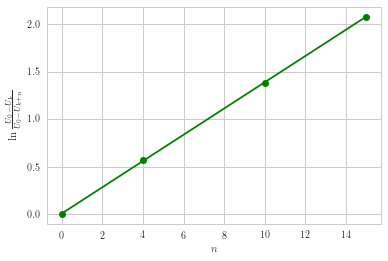

In [47]:
plot(ohm0inc.iloc[:,0], ohm0inc.iloc[:,2], 'go')
plot(ohm0inc.iloc[:,0], lin(ohm0inc.iloc[:,0], popt[0], popt[1]), '-g')
xlabel('$n$')
ylabel('$\ln{\\frac{U_0-U_k}{U_0-U_{k+n}}}$')
savefig('ohm0inc.png', dpi=200)
show()

In [63]:
ohm100inc = pd.read_csv('ohm100inc.tsv', delimiter='\t')
ohm100inc['$\\ln{\\dfrac{U_0-U_k}{U_0-U_{k+n}}}$'] = round(np.log(2.5/(3.6-ohm100inc.iloc[:,1])),2)
popt, pcov = curve_fit(lin, ohm100inc.iloc[:,0], ohm100inc.iloc[:,2])
ohm100inc

,$n$,"$U_{k+n},\ \text{дел}$",$\ln{\dfrac{U_0-U_k}{U_0-U_{k+n}}}$
0,0,1.10,0.00
1,1,2.00,0.45
2,2,2.60,0.92
3,3,3.00,1.43
4,4,3.25,1.97


In [51]:
popt[0], np.sqrt(pcov[0][0])

(0.49130549673158724, 0.011061491499385945)

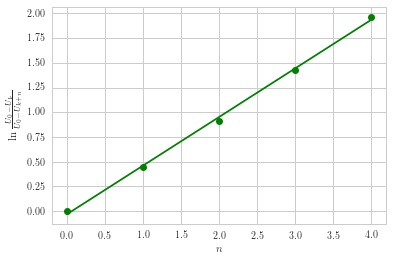

In [52]:
plot(ohm100inc.iloc[:,0], ohm100inc.iloc[:,2], 'go')
plot(ohm100inc.iloc[:,0], lin(ohm100inc.iloc[:,0], popt[0], popt[1]), '-g')
xlabel('$n$')
ylabel('$\ln{\\frac{U_0-U_k}{U_0-U_{k+n}}}$')
savefig('ohm100inc.png', dpi=200)
show()

In [65]:
ohm0dec = pd.read_csv('ohm0dec.tsv', delimiter='\t')
ohm0dec['$\\ln{\\dfrac{U_k}{U_{k+n}}}$'] = round(np.log(ohm0dec.iloc[0,1]/ohm0dec.iloc[:,1]),2)
popt, pcov = curve_fit(lin, ohm0dec.iloc[:,0], ohm0dec.iloc[:,2])
ohm0dec

,$n$,"$U_{k+n},\ \text{дел}$",$\ln{\dfrac{U_k}{U_{k+n}}}$
0,0,3.00,0.00
1,3,2.15,0.33
2,5,1.70,0.57
3,9,1.10,1.00


In [54]:
popt[0], np.sqrt(pcov[0][0])

(0.11170157864477048, 0.0010266392546598674)

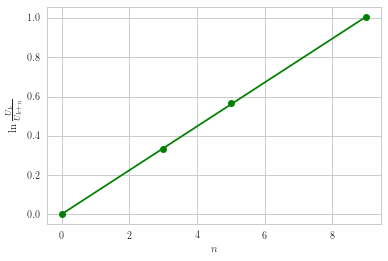

In [55]:
plot(ohm0dec.iloc[:,0], ohm0dec.iloc[:,2], 'go')
plot(ohm0dec.iloc[:,0], lin(ohm0dec.iloc[:,0], popt[0], popt[1]), '-g')
xlabel('$n$')
ylabel('$\ln{\\frac{U_k}{U_{k+n}}}$')
savefig('ohm0dec.png', dpi=200)
show()

In [66]:
ohm100dec = pd.read_csv('ohm100dec.tsv', delimiter='\t')
ohm100dec['$\\ln{\\dfrac{U_k}{U_{k+n}}}$'] = round(np.log(ohm100dec.iloc[0,1]/ohm100dec.iloc[:,1]),2)
popt, pcov = curve_fit(lin, ohm100dec.iloc[:,0], ohm100dec.iloc[:,2])
ohm100dec

,$n$,"$U_{k+n},\ \text{дел}$",$\ln{\dfrac{U_k}{U_{k+n}}}$
0,0,2.8,0.00
1,1,1.8,0.44
2,2,1.2,0.85
3,3,0.8,1.25
4,4,0.5,1.72


In [57]:
popt[0], np.sqrt(pcov[0][0])

(0.42564634116860101, 0.0064711730998421122)

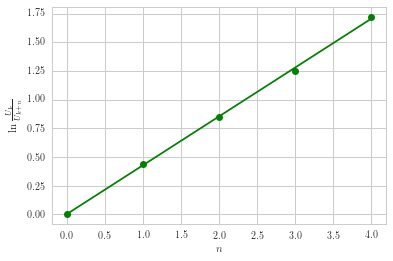

In [58]:
plot(ohm100dec.iloc[:,0], ohm100dec.iloc[:,2], 'go')
plot(ohm100dec.iloc[:,0], lin(ohm100dec.iloc[:,0], popt[0], popt[1]), '-g')
xlabel('$n$')
ylabel('$\ln{\\frac{U_k}{U_{k+n}}}$')
savefig('ohm100dec.png', dpi=200)
show()

In [67]:
sl.table(ohm0inc)

\begin{tabular}{rrr}\\
$n$ & $U_{k+n},\ \text{дел}$ & $\ln{\dfrac{U_0-U_k}{U_0-U_{k+n}}}$\\ \hline
$0.0$ & $1.6$ & $0.0$ \\
$4.0$ & $2.3$ & $0.58$ \\
$10.0$ & $2.8$ & $1.39$ \\
$15.0$ & $3.0$ & $2.08$ \\
\end{tabular}


In [68]:
sl.table(ohm100inc)

\begin{tabular}{rrr}\\
$n$ & $U_{k+n},\ \text{дел}$ & $\ln{\dfrac{U_0-U_k}{U_0-U_{k+n}}}$\\ \hline
$0.0$ & $1.1$ & $0.0$ \\
$1.0$ & $2.0$ & $0.45$ \\
$2.0$ & $2.6$ & $0.92$ \\
$3.0$ & $3.0$ & $1.43$ \\
$4.0$ & $3.25$ & $1.97$ \\
\end{tabular}


In [69]:
sl.table(ohm0dec)

\begin{tabular}{rrr}\\
$n$ & $U_{k+n},\ \text{дел}$ & $\ln{\dfrac{U_k}{U_{k+n}}}$\\ \hline
$0.0$ & $3.0$ & $0.0$ \\
$3.0$ & $2.15$ & $0.33$ \\
$5.0$ & $1.7$ & $0.57$ \\
$9.0$ & $1.1$ & $1.0$ \\
\end{tabular}


In [70]:
sl.table(ohm100dec)

\begin{tabular}{rrr}\\
$n$ & $U_{k+n},\ \text{дел}$ & $\ln{\dfrac{U_k}{U_{k+n}}}$\\ \hline
$0.0$ & $2.8$ & $0.0$ \\
$1.0$ & $1.8$ & $0.44$ \\
$2.0$ & $1.2$ & $0.85$ \\
$3.0$ & $0.8$ & $1.25$ \\
$4.0$ & $0.5$ & $1.72$ \\
\end{tabular}
